# Bureau of Labor Statistics API Project

In [514]:
import requests
import json
import pandas as pd
%run APIkeys.py
key = os.environ['BLS_API_key']

In [515]:
#codes that will be used to query the api
defaultLoc = "CUUR0000"
newYark = "CUURS12A"
phil = "CUURS12B"
chic = "CUURS23A"
defaultItem = "SA0"
trans = "SAT"
fuel = "SETB"
food = "SAF1"
rent = "SEHA"
util = "SAH2"
apprl = "SAA"
rec = "SAR"
dura = "SAD"

In [516]:
locations = [newYark,phil,chic,defaultLoc]
goods = [trans,fuel,food,rent,util,apprl,rec,dura,defaultItem]

In [517]:
#combine each location code with each product code. form a list
def create_varList(location):
    varList = []
    for x in goods:
        varList.append(location+x)
    return varList
    

In [518]:
newYark_varList = create_varList(newYark)
phil_varList = create_varList(phil)
chic_varList = create_varList(chic)

### Function to call API and retrieve data

In [519]:
def multiSeriesV4(varList,myKey): #inputs are the list of item codes for each city and personal API key
   
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  
    headers = {'Content-type': 'application/json'} 

    parameters = {
        "seriesid":varList,
        "startyear":"2017", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) #convert to json
    
    p = requests.post(base_url, data=data, headers=headers) #interact with server
    json_data = json.loads(p.text) #accquired data
    
    n = len(varList) 
    
    new_df = pd.DataFrame(columns=['year', 'period']) 
    for item in range(n):
        l = len(json_data['Results']['series'][item]['data']) #navigating within the dictiornary retrieved
        if l == 0:
            print('Series ',varList[item],' does not exist')
        else:
            
            print('Series ',varList[item],' exists with ',l,' observations')
            d = json_data['Results']['series'][item]['data']
            current_df = pd.DataFrame(data=d)#setting dataframe to the data
            current_df = current_df[['year','period','value']].astype({'value': 'float64'})#creating column for each item in varList
            current_df = current_df.rename(columns = {'value':varList[item]}) #rename column to name of item
            new_df = new_df.merge(current_df, on = ['year','period'],how='outer') #attaching each item column to the dataframe
    
    return new_df

In [520]:
df_newYark = multiSeriesV4(newYark_varList,key)

Series  CUURS12ASAT  exists with  62  observations
Series  CUURS12ASETB  exists with  62  observations
Series  CUURS12ASAF1  exists with  62  observations
Series  CUURS12ASEHA  exists with  62  observations
Series  CUURS12ASAH2  exists with  62  observations
Series  CUURS12ASAA  exists with  62  observations
Series  CUURS12ASAR  exists with  62  observations
Series  CUURS12ASAD  exists with  62  observations
Series  CUURS12ASA0  exists with  62  observations


In [521]:
df_newYark.head()

,year,period,CUURS12ASAT,CUURS12ASETB,CUURS12ASAF1,CUURS12ASEHA,CUURS12ASAH2,CUURS12ASAA,CUURS12ASAR,CUURS12ASAD,CUURS12ASA0
0,2022,M02,251.934,285.025,307.079,414.299,213.733,129.746,140.321,113.062,301.151
1,2022,M01,246.742,270.875,305.120,412.105,241.143,128.412,139.592,111.650,300.164
2,2021,M12,247.278,273.756,302.121,410.839,210.056,121.188,138.384,109.670,296.865
3,2021,M11,247.737,277.098,301.334,410.245,212.512,123.389,140.562,108.264,297.490
4,2021,M10,243.749,266.644,299.049,410.024,215.260,128.729,138.870,107.002,296.472


In [522]:
df_phil = multiSeriesV4(phil_varList,key)

Series  CUURS12BSAT  exists with  31  observations
Series  CUURS12BSETB  exists with  62  observations
Series  CUURS12BSAF1  exists with  31  observations
Series  CUURS12BSEHA  exists with  62  observations
Series  CUURS12BSAH2  exists with  31  observations
Series  CUURS12BSAA  exists with  31  observations
Series  CUURS12BSAR  exists with  31  observations
Series  CUURS12BSAD  exists with  31  observations
Series  CUURS12BSA0  exists with  31  observations


In [523]:
df_phil.head()
# df_phil contains many missing values. will need to deal with them appropriately to create meaningful visualizations

,year,period,CUURS12BSAT,CUURS12BSETB,CUURS12BSAF1,CUURS12BSEHA,CUURS12BSAH2,CUURS12BSAA,CUURS12BSAR,CUURS12BSAD,CUURS12BSA0
0,2022,M02,251.620,333.089,266.116,333.117,242.304,112.696,131.675,132.317,281.402
1,2021,M12,245.890,318.304,260.566,331.017,232.186,104.635,128.821,129.603,277.163
2,2021,M10,243.516,310.673,256.795,326.997,221.643,108.967,128.287,129.302,274.647
3,2021,M08,239.394,295.323,252.659,326.468,215.703,109.781,127.160,126.361,272.044
4,2021,M06,238.189,285.626,252.233,324.064,212.873,107.951,128.137,125.249,270.499


In [524]:
df_chic = multiSeriesV4(chic_varList,key)

Series  CUURS23ASAT  exists with  62  observations
Series  CUURS23ASETB  exists with  62  observations
Series  CUURS23ASAF1  exists with  62  observations
Series  CUURS23ASEHA  exists with  62  observations
Series  CUURS23ASAH2  exists with  62  observations
Series  CUURS23ASAA  exists with  62  observations
Series  CUURS23ASAR  exists with  62  observations
Series  CUURS23ASAD  exists with  62  observations
Series  CUURS23ASA0  exists with  62  observations


In [525]:
df_chic.head()

,year,period,CUURS23ASAT,CUURS23ASETB,CUURS23ASAF1,CUURS23ASEHA,CUURS23ASAH2,CUURS23ASAA,CUURS23ASAR,CUURS23ASAD,CUURS23ASA0
0,2022,M02,219.412,322.798,290.235,367.296,248.263,90.265,119.738,100.013,264.828
1,2022,M01,214.728,302.793,289.350,365.851,246.308,85.619,117.793,100.057,262.730
2,2021,M12,213.160,301.508,285.170,364.376,247.096,82.422,116.636,99.187,260.368
3,2021,M11,211.869,313.647,284.159,363.766,242.674,82.241,114.917,96.180,259.254
4,2021,M10,210.302,308.848,281.868,361.733,241.751,85.005,114.428,96.300,258.621


### renaming columns for readability

In [526]:
df_chic = df_chic.rename(columns = {'CUURS23ASAT':'trans',
                                    'CUURS23ASETB':'fuel',
                                    'CUURS23ASAF1':'food',
                                    'CUURS23ASEHA':'rent',
                                    'CUURS23ASAH2':'util',
                                    'CUURS23ASAA':'apprl',
                                    'CUURS23ASAR':'rec',
                                    'CUURS23ASAD':'dura',
                                    'CUURS23ASA0':'default'})

In [527]:
df_newYark = df_newYark.rename(columns = {'CUURS12ASAT':'trans',
                                          'CUURS12ASETB':'fuel',
                                          'CUURS12ASAF1':'food',
                                          'CUURS12ASEHA':'rent',
                                          'CUURS12ASAH2':'util',
                                          'CUURS12ASAA':'apprl',
                                          'CUURS12ASAR':'rec',
                                          'CUURS12ASAD':'dura',
                                          'CUURS12ASA0':'default'})

In [528]:
df_phil = df_phil.rename(columns = {'CUURS12BSAT':'trans',
                                    'CUURS12BSETB':'fuel',
                                    'CUURS12BSAF1':'food',
                                    'CUURS12BSEHA':'rent',
                                    'CUURS12BSAH2':'util',
                                    'CUURS12BSAA':'apprl',
                                    'CUURS12BSAR':'rec',
                                    'CUURS12BSAD':'dura',
                                    'CUURS12BSA0':'default'})
df_phil = df_phil.fillna(method='ffill')
#forward-fill propagates the last observed non-null value forward until another non-null value is encountered

In [529]:
dfl = [df_newYark, df_phil, df_chic]
#create a list of datarames. can itereate through them in a loop if need be

In [530]:
#sort values in descending order so they graph well
for x in dfl:
    x.sort_values(by=['year','period'],inplace=True,ascending=False)

### Creating the CPI for each location with the designated weights
#### locations
newYark - 0.46; Largest concentrated population of students.

chic - 0. 24

phil - 0.30; Next Largest

#### basket items
trans - 0.06; within city schools transportation is not as necessary as other campuses.

fuel - 0.02; even smaller consideration with low importance on transportation.

food - 0.22; one of these most necessary items on the list. Must eat.

rent - 0.3; while in school you must have housing, and somewhere to eat. Most necessary.

util - 0.08;  minor additional cost to rent and food.

apprl - 0.2; it is important to have clean presentable clothing.

rec - 0.1;  this is not a necessity, however, recreation is required to keep healthy.

dura - 0.02; preserved food/items which store long.



In [531]:
import numpy as np
basket_weights = {
    "trans":0.06,
    "fuel":0.02,
    "food":0.22,
    "rent":0.3,
    "util":0.08,
    "apprl":0.2,
    "rec":0.1,
    "dura":0.02}

location_weights = {
    "newYark":0.46,
    "chic":0.24,
    "phil":0.3
}

In [532]:
def create_cpi(dataframe):
    my_weights = []
    my_items = []
    for key, value in basket_weights.items():#takes in the dict and splits value and key into 2 seperate lists
        my_items.append(key)
        my_weights.append(value)
    
    cpi = np.dot(dataframe.iloc[:,2:10].values.astype(float),my_weights) #uses dot product to apply each weight to the row values to create CPI
    dataframe['myCPI'] = cpi
    

In [533]:
for x in dfl:
    create_cpi(x)

### Calculating and Plotting Inflation

In [534]:
from matplotlib import pyplot as plt
def inflation(myData, cpi, scale):#takes in desired dataframe, column with cpi values, and time scale
    lags =[] #each time period where inflation will be calculated
    changes = [] #the value of inflation at each lag
    index_list = [0] 
    limit = int(len(myData)/12) #hardcoded limit that limits loop to 5 times as each data set only contains 5 full years of data
    index_list = index_list*limit
    i = 0
    for x in index_list:
        new = myData[cpi].iloc[i] #grab first cpi value
        i+=12
        old = myData[cpi].iloc[i] #grab cpi value 12 periods(months) below
        year = myData[scale].iloc[i] #grabs the year
        
        change = (new/old - 1)*100 #inflation calculation
        lags.append(year) 
        changes.append(change)
        
        print("the inflation for ", year,"was ",change)
    lags.reverse() # reverse the sets so data will have a positive slope that relates to inflation increasing over time
    changes.reverse()
    plt.plot(lags, changes, color='green', marker='o', linestyle='solid')


    
    

### Visualizations of Inflation

the inflation for  2021 was  7.730180571452583
the inflation for  2020 was  0.7776498457957803
the inflation for  2019 was  3.108219057069017
the inflation for  2018 was  0.5293156528456189
the inflation for  2017 was  1.2362381295834224


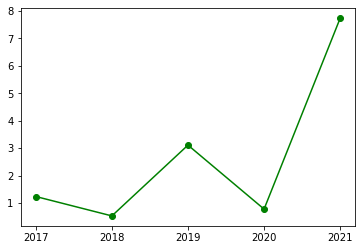

In [535]:
inflation(df_phil,'myCPI','year')

the inflation for  2021 was  4.76065616603405
the inflation for  2020 was  1.5957372713446771
the inflation for  2019 was  2.04497318286585
the inflation for  2018 was  1.1843829043872711
the inflation for  2017 was  2.2302127905283298


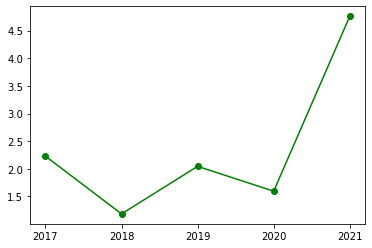

In [536]:
inflation(df_newYark, 'myCPI','year')

the inflation for  2021 was  7.485033688372766
the inflation for  2020 was  2.2139444766241745
the inflation for  2019 was  1.990438063025568
the inflation for  2018 was  1.7888365075075408
the inflation for  2017 was  2.3672485727971537


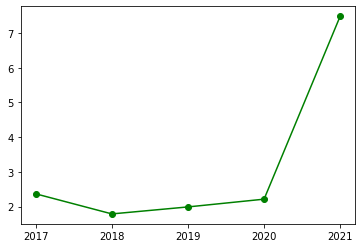

In [537]:
inflation(df_chic, 'myCPI','year')

In [538]:
# Creating a combined Dataframe to plot all the CPIs on one graph
combined = pd.DataFrame(zip(df_newYark.year, #years are same between dataframes as entrys for each are identical
                            df_newYark.period, 
                            df_phil.myCPI, #grab all dataframe cpis as well as the national cpi
                            df_newYark.myCPI, 
                            df_chic.myCPI,
                            df.CUUR0000SA0)) # national CPI

In [539]:
combined.head()

,0,1,2,3,4,5
0,2022,M02,237.97696,272.00480,245.54928,283.716
1,2022,M01,222.60456,272.14596,242.96072,281.148
2,2021,M12,232.72514,267.10400,240.76938,278.802
3,2021,M11,221.78248,267.67340,239.90728,277.948
4,2021,M10,230.35800,267.74944,239.03582,276.589


In [540]:
combined = combined.rename(columns = {0:'year',
                                      1:'period',
                                      2:'philadelphia',
                                      3:'new_york',
                                      4:'chicago',
                                      5:'nationalCPI'})

In [541]:
#creating the average of myCPI by using the location weight. will compare this to the national CPI
combined['averageCPI'] = (combined['philadelphia']*.3)+(combined['new_york']*.46)+(combined['chicago']*.24)

In [542]:
combined.sort_values(by=['year','period'],inplace=True,ascending=True)

In [543]:
combined.head()

,year,period,philadelphia,new_york,chicago,nationalCPI,averageCPI
61,2017,M01,208.92434,240.93926,209.77972,242.839,223.856494
60,2017,M02,208.88694,242.11322,210.30998,243.603,224.512558
59,2017,M03,208.97020,242.93088,210.21002,243.801,224.889670
58,2017,M04,209.93280,243.06876,211.41622,244.524,225.531362
57,2017,M05,209.55050,243.11050,211.49284,244.733,225.454262


<AxesSubplot:xlabel='year'>

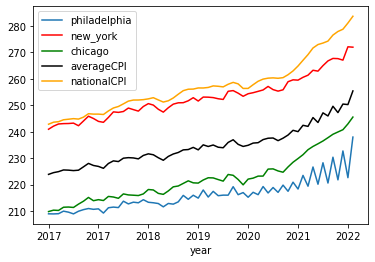

In [544]:
ax = plt.gca()
combined.plot(kind='line',x='year',y='philadelphia',ax=ax)
combined.plot(kind='line',x='year',y='new_york', color='red', ax=ax)
combined.plot(kind='line',x='year',y='chicago', color='green', ax=ax)
combined.plot(kind='line',x='year',y='averageCPI', color='black', ax=ax)
combined.plot(kind='line',x='year',y='nationalCPI', color='orange', ax=ax)